# Homework #1

**See Canvas for HW #1 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

## Problem A.1

Let $x_1,...,x_n$ be a variable measured for units in a sample. Let $\mu$ denote the mean of the *population* from which the sample came. The mean of the *sample*, as always, is $\displaystyle \bar{x} = \frac{1}{n}\sum^n_{i=1}x_i$. The sample variance is $\displaystyle s_x^2 =\frac{1}{n-1}\sum^n_{i=1}(x_i - \bar{x})^2$.


**A.1 (a) [7 points] For what value of $c$ is the quantity $\sum^n_{i=1}(x_i - c)^2$ minimized? Treat $x_i$, $i= 1,...,n$ as fixed constants. (Remember calculus?!)**

We are asked to find the minimum of $f(c) = \sum^n_{i=1}(x_i - c)^2$, with $x_i$ fixed for $i=1,...,n$. To find the minimum, first, we take the derivative of $f(c)$, and set that derivative equal to zero. Then, we check that we have actually found a minimum (as opposed to a maximum).

\begin{align*}
f'(c) = -2\sum^n_{i=1}(x_i - c)
\end{align*}

\begin{align*}
f'(c) &= 0 \implies -2\sum^n_{i=1}(x_i - c) = 0 \implies \sum^n_{i=1}(x_i - c) = 0 \implies \sum^n_{i=1}x_i = nc  \implies c^* = \frac{1}{n}\sum^n_{i=1}x_i = \bar{x},
\end{align*}
where $c^*$ is the extrema. Is $c^*$ a minimum? Let's use the second derivative test:

\begin{align*}
f''(c) = \left(-2\sum^n_{i=1}x_i  + 2nc\right)' = 2n,
\end{align*}

which is *always* positive, including when $c = c^* = \bar{x}$. The second derivative test says that if the second derivative is positive at $c^*$, then $c^*$ is a minimum.

**A.1 (b) [4 points] Using the result from part (a), which of the two quantities $\sum^n_{i=1}(x_i - \bar{x})^2$ and $\sum^n_{i=1}(x_i - \mu)^2$ will be smaller than the other (assuming that $\bar{x} \ne \mu$)?**

Based on part (a), we know that $c = \bar{x}$ minimizes $\sum^n_{i=1}(x_i - c)^2$. So, $\sum^n_{i=1}(x_i - \bar{x})^2$ will be smaller than $\sum^n_{i=1}(x_i - \mu)^2$, unless, of course, $\mu = \bar{x}$ (which is very unlikely!).

**A.1 (c) [8 points] Let $y_i = x_i - \bar{x}$, for $i = 1,...,n$. How does the value of $s_y^2$ compare to $s_x^2$? Prove your result. (You might start by simulating some data in R to see what happens; but then prove it in general!)**

First, note that 

\begin{align*}
\bar{y} = \frac{1}{n}\sum^n_{i=1}y_i = \frac{1}{n}\sum^n_{i=1}(x_i - \bar{x}) = \frac{1}{n}\sum^n_{i=1}x_i - \frac{1}{n}n\bar{x} = \bar{x} - \bar{x} = 0.
\end{align*}

Thus, 

\begin{align*}
s_y^2 =\frac{1}{n-1}\sum^n_{i=1}(y_i - \bar{y})^2 = s_y^2 =\frac{1}{n-1}\sum^n_{i=1}y_i^2 =\frac{1}{n-1}\sum^n_{i=1}(x_i - \bar{x})^2 = s_x^2.
\end{align*}



**A.1 (d) [8 points] Let $\displaystyle z_i =  (x_i - \bar{x})/s_x$ for $i = 1,...,n$. What are $s_z^2$ and $s_z$? Prove your result. (You might start by simulating some data in R to see what happens; but then prove it in general!)**

Note that $\bar{z} = 0$ for the same reasoning as in the previous part. Thus, plugging in $\displaystyle z_i =  (x_i - \bar{x})/s_x$ into $s_z^2$, we get:

\begin{align*}
s_z^2 &= \frac{1}{n-1}\sum^n_{i=1}\left(\frac{x_i - \bar{x}}{\sqrt{\frac{1}{n-1}\sum^n_{j=1}\left(x_j-\bar{x} \right)^2}} \right)^2 = \frac{1}{n-1}\sum^n_{i=1}\frac{\left(x_i - \bar{x} \right)^2}{\frac{1}{n-1}\sum^n_{j=1}\left(x_j-\bar{x} \right)^2} \\
&=\frac{n-1}{n-1}\frac{\sum^n_{i=1}\left(x_i - \bar{x} \right)^2}{\sum^n_{j=1}\left(x_j-\bar{x} \right)^2} = 1.
\end{align*}

## B. Computational Problems

## Problem B.1: Numerical Summaries


The dataset below contains information on 522 homes for sale. The variables are:

1. `ID`: house ID nubmer
2. `Price`: the sale price of the house
3. `Sqft`: the size of the house in square feet
4. `Bedroom`: the number of bedrooms in the house
5. `Bathroom`: the number of bathrooms in the house
6. `Airconditioning`: whether the house has air conditioning or not (`0` is no, `1` is yes)
7. `Garage`: the number of garages associated with the house
8. `Pool`: whether the house has a pool (`0` is no, `1` is yes)
9. other variables that we won't use!

First, we load in the data:

In [36]:
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2) #a package for nice plots!

#read in the data from the web...
house = read.csv(url(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/housing.txt")), sep=",")  


#prints the names in the dataframe
summary(house)

       ID            Price             Sqft         Bedroom     
 Min.   :  1.0   Min.   : 84000   Min.   : 980   Min.   :0.000  
 1st Qu.:131.2   1st Qu.:180000   1st Qu.:1701   1st Qu.:3.000  
 Median :261.5   Median :229900   Median :2061   Median :3.000  
 Mean   :261.5   Mean   :277894   Mean   :2261   Mean   :3.471  
 3rd Qu.:391.8   3rd Qu.:335000   3rd Qu.:2636   3rd Qu.:4.000  
 Max.   :522.0   Max.   :920000   Max.   :5032   Max.   :7.000  
    Bathroom     Airconditioning      Garage         Pool        
 Min.   :0.000   Min.   :0.0000   Min.   :0.0   Min.   :0.00000  
 1st Qu.:2.000   1st Qu.:1.0000   1st Qu.:2.0   1st Qu.:0.00000  
 Median :3.000   Median :1.0000   Median :2.0   Median :0.00000  
 Mean   :2.642   Mean   :0.8314   Mean   :2.1   Mean   :0.06897  
 3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:2.0   3rd Qu.:0.00000  
 Max.   :7.000   Max.   :1.0000   Max.   :7.0   Max.   :1.00000  
   YearBuild       Quality           Lot          AdjHighway     
 Min.   :1885   M

**B.1 (a) [5 points] Change the bedroom, bathroom, air conditiong, garage, and pool variables to factors. Remove the `YearBuild`, `Quality`, `Lot`, and `AdjHighway` variables. Store this new data frame in `house2`. Then print a summary of `house2`.**

We will use `house2` for the rest of B.1.

In [5]:
house2 = house[,1:8]
house2$Bedroom = as.factor(house$Bedroom)
house2$Bathroom = as.factor(house$Bathroom)
house2$Airconditioning = as.factor(house$Airconditioning)
house2$Garage = as.factor(house$Garage)
house2$Pool = as.factor(house$Pool)

summary(house2)

       ID            Price             Sqft         Bedroom       Bathroom  
 Min.   :  1.0   Min.   : 84000   Min.   : 980   3      :202   3      :175  
 1st Qu.:131.2   1st Qu.:180000   1st Qu.:1701   4      :179   2      :171  
 Median :261.5   Median :229900   Median :2061   2      : 64   4      : 84  
 Mean   :261.5   Mean   :277894   Mean   :2261   5      : 52   1      : 71  
 3rd Qu.:391.8   3rd Qu.:335000   3rd Qu.:2636   6      : 12   5      : 17  
 Max.   :522.0   Max.   :920000   Max.   :5032   1      :  9   7      :  2  
                                                 (Other):  4   (Other):  2  
 Airconditioning Garage  Pool   
 0: 88           0:  7   0:486  
 1:434           1: 52   1: 36  
                 2:353          
                 3:106          
                 4:  2          
                 5:  1          
                 7:  1          

**B.1 (b) [4 points] Write code that extracts all of the rows/houses with a pool. Store your answer as a data frame in `House_Pool`.**

In [18]:
library(tidyverse)
library(dplyr)
House_Pool = house2[house2$Pool == 1,]

**B.1 (c) [4 points] Write code that extracts all of the rows/houses with square footage less than the median. Store your answer as a data frame in `House_Small`.**


In [4]:
House_Small = house2[house2$Sqft < median(house2$Sqft),]
#Check:
#sum(ifelse(House_Small$Sqft < median(house2$Sqft),0,1))


**B.1 (d) [4 points] What is the mean house price (across all variables, in `house2`)? Store your answer in `average_price`**

In [5]:
average_price = mean(house2$Price)

**B.1 (e) [4 points] What is the average house price for houses with a pool (again, using `house2`)? Store your answer in `average_price_pool`.**

In [35]:
average_price_pool = mean(house2$Price[house2$Pool == 1])

#Tidyverse method: 
library(tidyverse)
library(dplyr)
average_price_pool_tidy = house2 %>% 
    group_by(Pool) %>% 
    summarize(continuous_mean = mean(Price, na.rm = TRUE))

as.numeric(average_price_pool_tidy[2,2]) - average_price_pool

[1] 0

**B.1 (f) [5 points] Compare the average house price for houses with a pool to the average house price for houses without a pool. Which is larger?** 

Based on the data alone, can you draw any *causal* conclusions about the effect of a pool on the price of a home? Why or why not?

In [7]:
average_price_pool > mean(house2$Price[house2$Pool == 0])

[1] TRUE

Based on the data alone, we should not draw a causal conclusion about the effect of a pool on the price of a house. All that we can say at this point is that *on average*, houses with a pool sell for more money than houses without a pool. 

## Problem B.2 [5 points]

Verify the results of Problem A.1, parts (c) and (d), by simulating $x_1,...,x_{50}$ from `rnorm(50,5,1)` and performing the relevant computations. 

In [8]:
# 50 normally distributed numbers with a mean of 5 and a standard deviation of 1
x = rnorm(50,5,1)
# mean, standard deviation, and variance of the 50 numbers
xbar = mean(x); sx = sd(x); sxsq = var(x)

#part (c)
# Define y as the differences of the 50 numbers and their mean and calc sd and variance
y = x - xbar; sy = sd(y); sysq = var(y)

# Show that x and y=x-xbar have same sd and variance by showing their difference is 0
abs(sx - sy)
abs(sxsq - sysq)

[1] 0

[1] 0

## Problem B.3: Graphical Summaries


The dataset for this question contains information on 522 homes for sale (the same dataset as in B.1). The variables are:

1. `ID`: house ID nubmer
2. `Price`: the sale price of the house
3. `Sqft`: the size of the house in square feet
4. `Bedroom`: the number of bedrooms in the house
5. `Bathroom`: the number of bathrooms in the house
6. `Airconditioning`: whether the house has air conditioning or not (`0` is no, `1` is yes)
7. `Garage`: the number of garages associated with the house
8. `Pool`: whether the house has a pool (`0` is no, `1` is yes)
9. other variables that we won't use!

Use the `house2` version of this dataset that you created in B.1.

**B.3 (a) [7 points] Create a scatterplot (preferably using `ggplot`, though you can earn full credit with a basic plot) of `Price` (vertical axis) against `Sqft` (horizontal axis). Use the plot to describe the relationship between these two variables.**

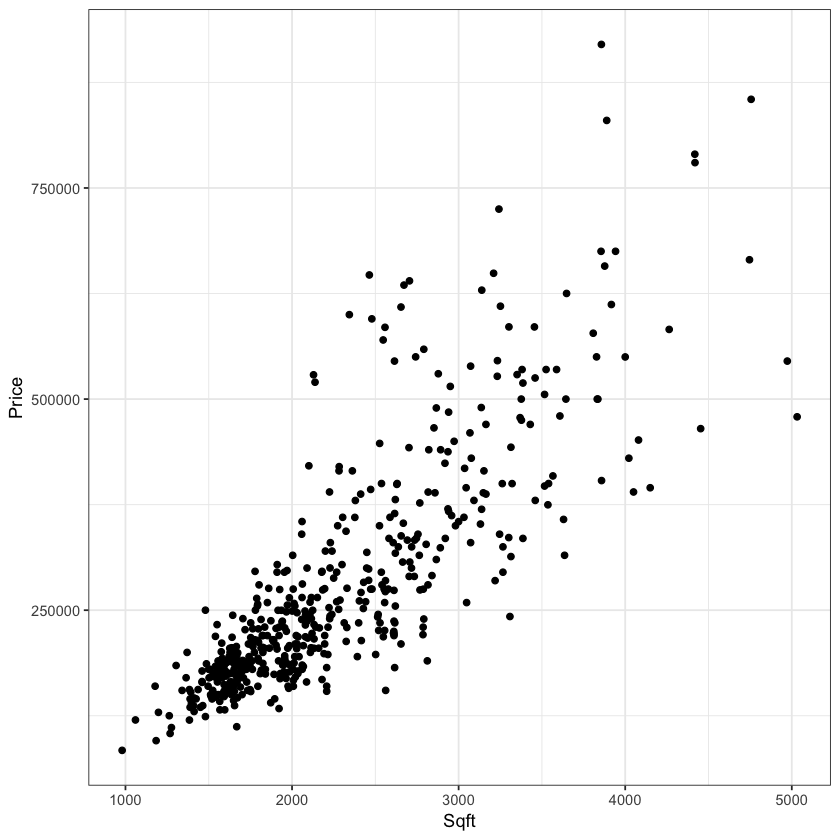

In [9]:
ggplot(house2) + 
    geom_point(aes(x = Sqft, y = Price)) + 
    theme_bw()

The relationship appears to be roughly linear. There appears to be more variability in `Price` for higher values for `Sqft` than for lower values of `Sqft`.

**B.3 (b) [12 points] Create histograms and characterize the distributions of the variables `Price` and `Sqft`. Are the distributions (i) symmetric/skewed, or (ii) unimodal/multimodal? (iii) Does it have any outliers?**

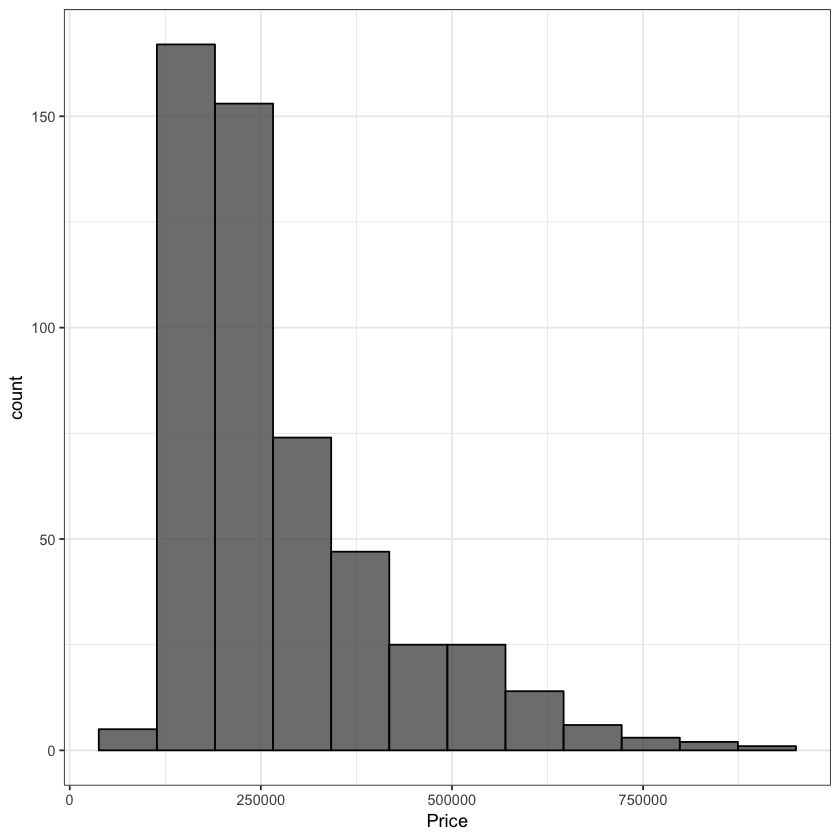

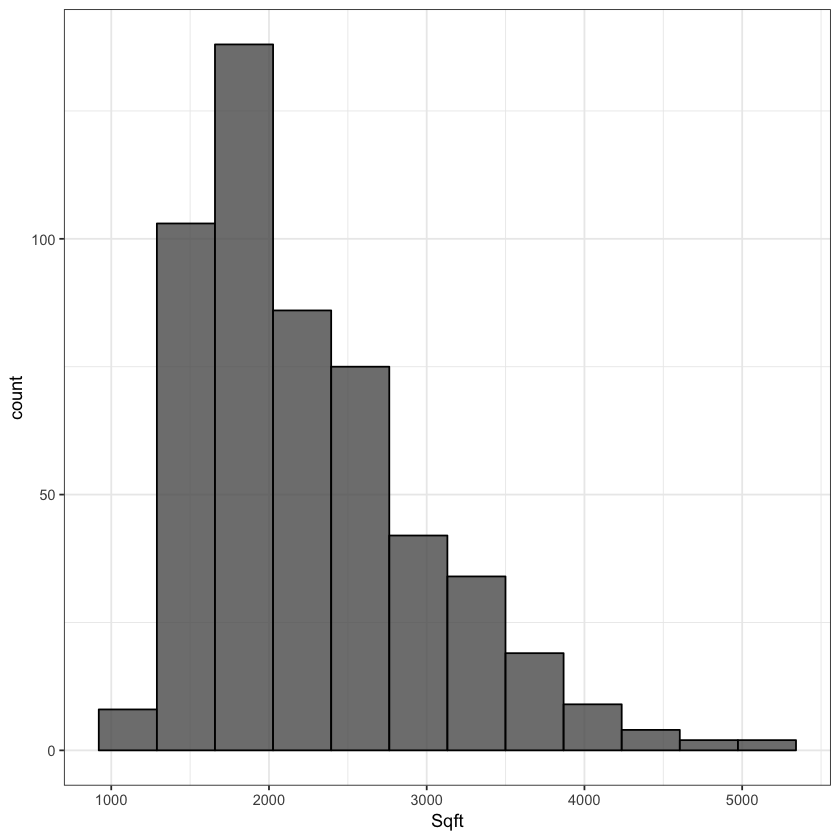

In [10]:
ggplot(house2) + 
    geom_histogram(aes(x = Price),bins =12, alpha = 0.8, color = "black") +
    theme_bw()

ggplot(house2) + 
    geom_histogram(aes(x = Sqft),bins =12, alpha = 0.8, color = "black") + 
    theme_bw()

`Price`:
- The distribution is skewed right
- It is unimodal
- At this point, an "outlier" is subjective. But there aren't any bars very far from others.

`Sqft`:
- The distribution is skewed right
- It is unimodal
- At this point, an "outlier" is subjective. But there aren't any bars very far from others.

**B.3(c) [10 points] Create a boxplot of `Price` conditioned on `Bedroom`. Are there any outliers? Does there appear to be a large difference in total price between homes with two bedrooms and homes with three bedrooms?**

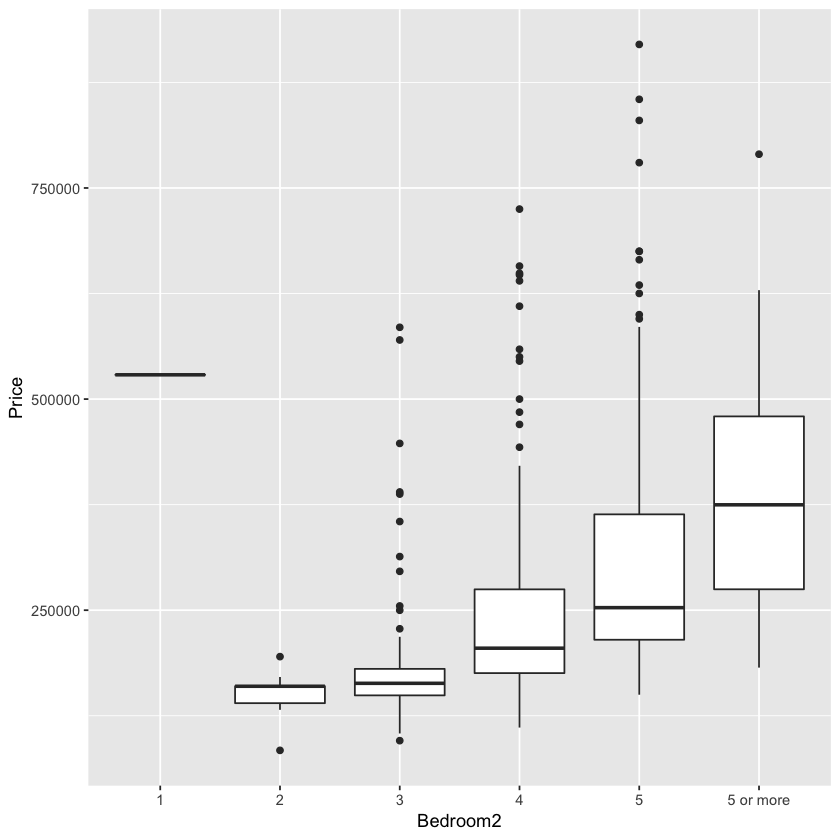

In [11]:
house2$Bedroom2 = ifelse(house2$Bedroom == "5" | house2$Bedroom == "6" | house2$Bedroom == "7","5 or more",house2$Bedroom)

ggplot(house2) + 
    geom_boxplot(aes(x = Bedroom2, y = Price))

- Are there any outliers? 
    - Yes, there are some outliers. For example, many four bedroom homes have prices much higher than the bulk of the distribution of four bedroom homes.

- Does there appear to be a large difference in total price between homes with two bedrooms and homes with three bedrooms?
    - The distributions overlap, and the median lines are close. But there is a long upper tail (and many outliers) in the distribution of `Price` of homes with three bedrooms. There are very few two bedroom homes above average.

## Problem B.4 [13 points]

Let's create a variable, `v`, that has a bimodal distribution. To do this, we'll make use of the following functions:

- `replicate()`. We used this function in the Introduction to Jupyter and R Notebook from the first week. It's a short way to write loops!
- `ifelse()`. This function will provide different tasks based on an output. For example, `ifelse(a < 5, 1, 0)` will output `1` if `a < 5` and `0` otherwise.
- `runif(n, 0, 1)`. This function generates `n` random numbers between `0` and `1`.
- `rnorm(n,a,b)`. We used this function in the Introduction to Jupyter and R Notebook from the first week. It generates `n` random numbers according to a bell curve, centered over `a`, with "spread" `b`

Ok, here's how we'll create `v`: 

1. Generate a single random number between `0` and `1`. 
2. If the number from the previous step is greater than `0.5`, generate a random number from the bell curve centered at `0` with spread `1`. On the other hand, if the number from the previous step is less than `0.5`, generate a random number from the bell curve centered at `5` with spread `1`.
2. Repeat this process `n = 1000` times.

Then, create a histogram of `v`, and set `breaks = 25`. What do you notice about the distribution?

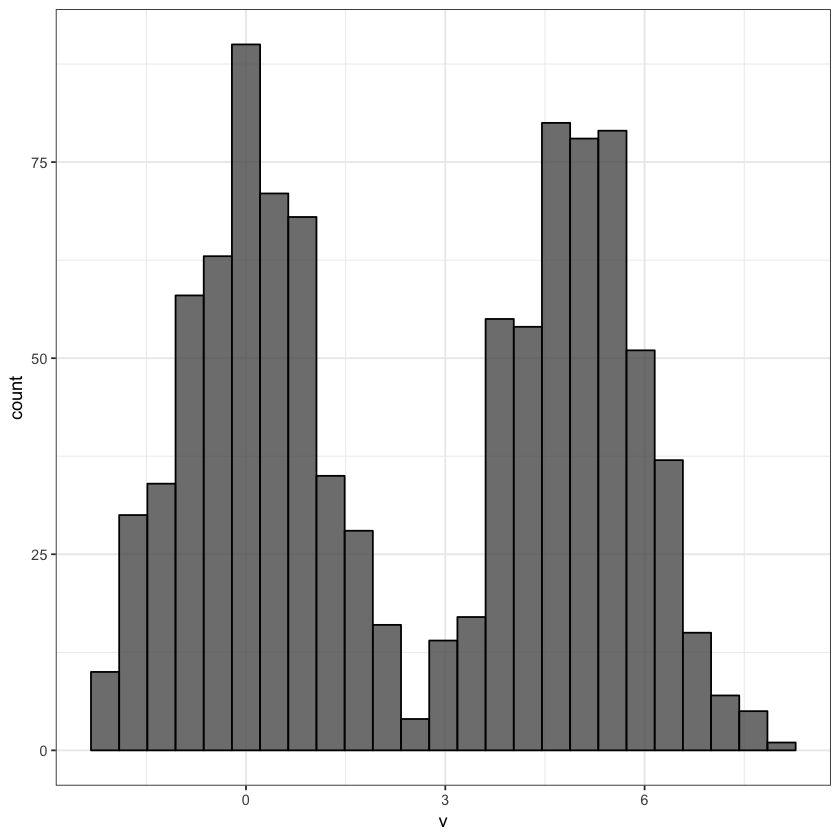

In [13]:
v = replicate(1000, ifelse(runif(1,0,1) >0.5, rnorm(1,0,1), rnorm(1,5,1)))
#base R
#hist(v, breaks = 25)

#ggplot
dfv = data.frame(v=v)
ggplot(dfv) + 
    geom_histogram(aes(x = v),bins =25, alpha = 0.8, color = "black") + 
    theme_bw()

The distribution is bimodal, with one peak around zero and the other around five!